In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [6]:
path = "C:\\Users\\Hp\\OneDrive\\Desktop\\PYTHON FOLDER\\medical_insurance_dataset.csv"
df = pd.read_csv(path, header=None)
print(df.head(10))

    0  1       2  3  4  5            6
0  19  1  27.900  0  1  3  16884.92400
1  18  2  33.770  1  0  4   1725.55230
2  28  2  33.000  3  0  4   4449.46200
3  33  2  22.705  0  0  1  21984.47061
4  32  2  28.880  0  0  1   3866.85520
5  31  1  25.740  0  ?  4   3756.62160
6  46  1  33.440  1  0  4   8240.58960
7  37  1  27.740  3  0  1   7281.50560
8  37  2  29.830  2  0  2   6406.41070
9  60  1  25.840  0  0  1  28923.13692


In [9]:
headers = ['age', 'gender', 'bmi', 'no_of_children','smoker','region', 'charges']
df.columns = headers

In [12]:
df.replace('?', np.nan, inplace=True)
print(df.head(10))

  age  gender     bmi  no_of_children smoker  region      charges
0  19       1  27.900               0      1       3  16884.92400
1  18       2  33.770               1      0       4   1725.55230
2  28       2  33.000               3      0       4   4449.46200
3  33       2  22.705               0      0       1  21984.47061
4  32       2  28.880               0      0       1   3866.85520
5  31       1  25.740               0    NaN       4   3756.62160
6  46       1  33.440               1      0       4   8240.58960
7  37       1  27.740               3      0       1   7281.50560
8  37       2  29.830               2      0       2   6406.41070
9  60       1  25.840               0      0       1  28923.13692


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2768 non-null   object 
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2765 non-null   object 
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB
None


In [20]:
# data wrangling
is_smoker = df['smoker'].value_counts().idxmax()
df['smoker'].replace(np.nan, is_smoker)

mean_age = df['age'].astype('float').mean(axis=0)
df['age'].replace(np.nan, mean_age, inplace=True)

df[['age', 'smoker']] = df[['age', 'smoker']].astype('int')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2772 non-null   int64  
 1   gender          2772 non-null   int64  
 2   bmi             2772 non-null   float64
 3   no_of_children  2772 non-null   int64  
 4   smoker          2772 non-null   int64  
 5   region          2772 non-null   int64  
 6   charges         2772 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 151.7 KB
None


In [21]:
# charges updated to 2 decimal places
df[['charges']] = np.round(df[['charges']].astype('float'), 2)
print(df.head())

   age  gender     bmi  no_of_children  smoker  region   charges
0   19       1  27.900               0       1       3  16884.92
1   18       2  33.770               1       0       4   1725.55
2   28       2  33.000               3       0       4   4449.46
3   33       2  22.705               0       0       1  21984.47
4   32       2  28.880               0       0       1   3866.86


(0.0, 100.0)

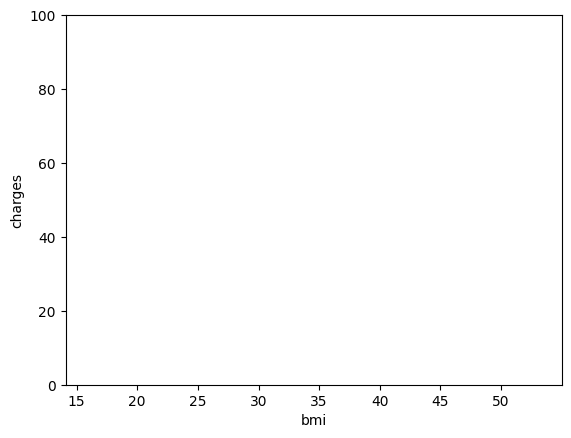

In [33]:
# implementing regresion chart
import seaborn as sns
import matplotlib.pyplot as plt
sns.regplot(x='bmi', y='charges', data=df, marker='o', line_kws={'color': 'red'})
plt.ylim(0, 100)

<Axes: xlabel='smoker', ylabel='charges'>

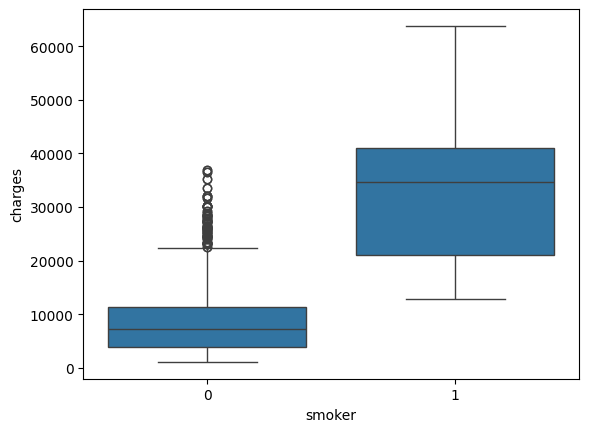

In [34]:
# implementing box plot for charges with respect t smokers
import seaborn as sns
sns.boxplot(x='smoker', y='charges', data=df)

In [35]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026046  0.113048        0.037574 -0.023286   
gender         -0.026046  1.000000  0.042924        0.016020  0.082326   
bmi             0.113048  0.042924  1.000000       -0.001492  0.011489   
no_of_children  0.037574  0.016020 -0.001492        1.000000  0.006362   
smoker         -0.023286  0.082326  0.011489        0.006362  1.000000   
region         -0.007167  0.022213  0.271119       -0.025717  0.054077   
charges         0.298624  0.062837  0.199846        0.066442  0.788783   

                  region   charges  
age            -0.007167  0.298624  
gender          0.022213  0.062837  
bmi             0.271119  0.199846  
no_of_children -0.025717  0.066442  
smoker          0.054077  0.788783  
region          1.000000  0.054058  
charges         0.054058  1.000000  


In [44]:
# to get the R2 score of the model
x = df [['smoker']]
y = df['charges']
lm = LinearRegression ()
lm.fit(x, y)
print(lm.score(x, y))

0.6221791733924185


In [45]:
# fit a linear regression model to predict the charges value
## definition of Y and lm remains same as used above
z = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]
lm.fit(z,y)
print(lm.score(z,y))

0.7504083820289634


In [57]:
# creating a training pipeline that use StandardScaler, Polynomial, & Linear Regression to create a model that can predict the charges values using all other attributes of the dataset--y & z use same values as defined in the previous cells
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
Input = [('Scale',StandardScaler()), ('poly',PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe = Pipeline(Input)
z = z.astype(float)
pipe.fit(z,y)
ypipe=pipe.predict(z)
print(r2_score(y,ypipe))


0.8452576213500093


In [59]:
# Model Refinement
##splitting the data into training and testing subset reserving 20% of the dataset-- z & y hold same values as in previous
from sklearn.model_selection import cross_val_score, train_test_split
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=1)

In [60]:
# Initializing a Ridge regressor that use hyperparameter
RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat=RidgeModel.predict(x_test)
print(r2_score(y_test, yhat))

0.6760807731582404


In [61]:
# Applying polynoimial transformation to the training parameter with degree=2. fitting to the same regression model above
## x_train, X_test, y_train, y_test hold same values as previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test, yhat))


0.6760807731582404
